In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

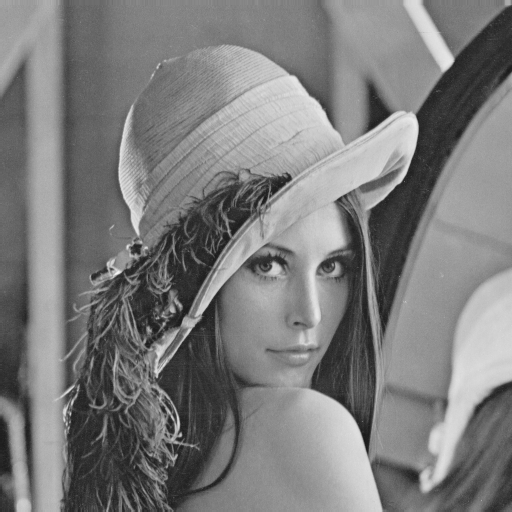

In [24]:
cv2_imshow(lena_gray)

In [13]:
octogonal_kernel = np.array([[0,1,1,1,0],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [0,1,1,1,0]],dtype=bool)
pattern_sum = np.sum(octogonal_kernel)

In [17]:
lena_gray[0:5,0:5][octogonal_kernel]

array([162, 162, 161, 162, 162, 162, 161, 162, 162, 162, 162, 161, 162,
       162, 162, 162, 161, 162, 162, 162, 161], dtype=uint8)

In [18]:
def Dilation(img, pattern):
  n,m = pattern.shape
  padding_img = np.zeros((img.shape[0]+n-1,img.shape[1]+m-1))
  n_size = (n-1)//2
  m_size = (m-1)//2
  padding_img[n_size:-n_size,m_size:-m_size]=img
  padding_img_to1 = padding_img
  convolu_img_to1 = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      convolu_img_to1[i,j] = np.max(padding_img_to1[i:i+n,j:j+m][pattern])
  return convolu_img_to1

In [19]:
def Erosion(img, pattern):
  n,m = pattern.shape
  padding_img = np.zeros((img.shape[0]+n-1,img.shape[1]+m-1))
  n_size = (n-1)//2
  m_size = (m-1)//2
  padding_img[n_size:-n_size,m_size:-m_size]=img
  padding_img_to1 = padding_img
  convolu_img_to1 = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      convolu_img_to1[i,j] = np.min(padding_img_to1[i:i+n,j:j+m][pattern])
  return convolu_img_to1

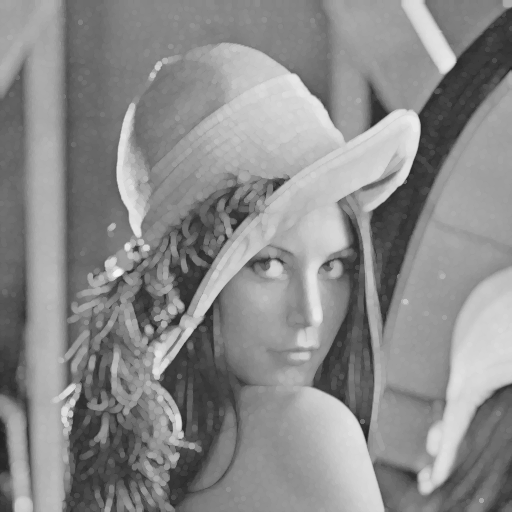

In [20]:
Dilation_binarize_lena = Dilation(lena_gray, octogonal_kernel)
cv2_imshow(Dilation_binarize_lena)

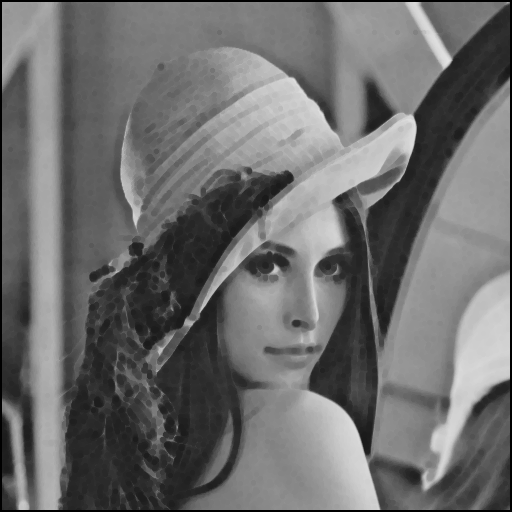

In [21]:
Erosion_binarize_lena = Erosion(lena_gray, octogonal_kernel)
cv2_imshow(Erosion_binarize_lena)

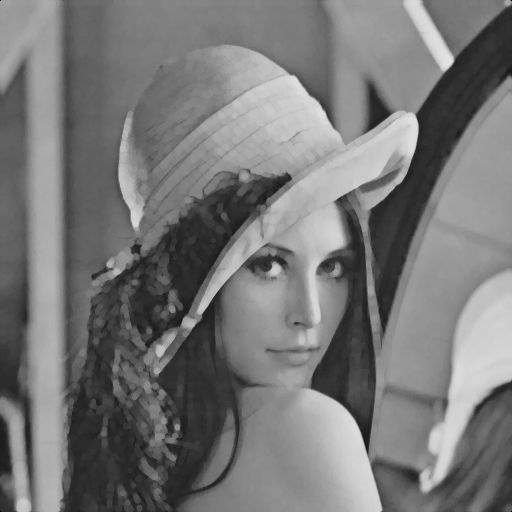

In [22]:
Opening_binarize_lena = Dilation(Erosion_binarize_lena, octogonal_kernel)
cv2_imshow(Opening_binarize_lena)

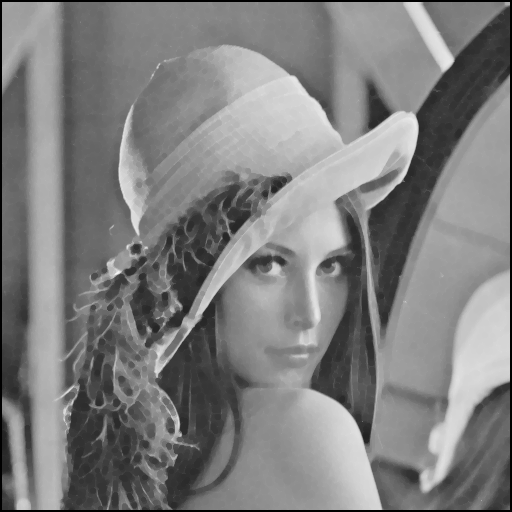

In [23]:
Closing_binarize_lena = Erosion(Dilation_binarize_lena, octogonal_kernel)
cv2_imshow(Closing_binarize_lena)

In [26]:
%%writefile /content/drive/MyDrive/CVHW/HW5.py
import cv2
import numpy as np

def Dilation(img, pattern):
  n,m = pattern.shape
  padding_img = np.zeros((img.shape[0]+n-1,img.shape[1]+m-1))
  n_size = (n-1)//2
  m_size = (m-1)//2
  padding_img[n_size:-n_size,m_size:-m_size]=img
  padding_img_to1 = padding_img
  convolu_img_to1 = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      convolu_img_to1[i,j] = np.max(padding_img_to1[i:i+n,j:j+m][pattern])
  return convolu_img_to1

def Erosion(img, pattern):
  n,m = pattern.shape
  padding_img = np.zeros((img.shape[0]+n-1,img.shape[1]+m-1))
  n_size = (n-1)//2
  m_size = (m-1)//2
  padding_img[n_size:-n_size,m_size:-m_size]=img
  padding_img_to1 = padding_img
  convolu_img_to1 = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      convolu_img_to1[i,j] = np.min(padding_img_to1[i:i+n,j:j+m][pattern])
  return convolu_img_to1

lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

octogonal_kernel = np.array([[0,1,1,1,0],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [0,1,1,1,0]],dtype=bool)

Dilation_binarize_lena = Dilation(lena_gray, octogonal_kernel)
Erosion_binarize_lena = Erosion(lena_gray, octogonal_kernel)
Opening_binarize_lena = Dilation(Erosion_binarize_lena, octogonal_kernel)
Closing_binarize_lena = Erosion(Dilation_binarize_lena, octogonal_kernel)

cv2.imwrite('Dilation_binarize_lena.bmp', Dilation_binarize_lena)
cv2.imwrite('Erosion_binarize_lena.bmp', Erosion_binarize_lena)
cv2.imwrite('Opening_binarize_lena.bmp', Opening_binarize_lena)
cv2.imwrite('Closing_binarize_lena.bmp', Closing_binarize_lena)

Writing /content/drive/MyDrive/CVHW/HW5.py
